In [29]:
import os
import json
#!pip install spacy  
## von mir hinzugefügt, da sonst Meldung, dass Modul nicht gefunden wurde
import spacy
#!python -m spacy download de_core_news_sm
## von mir hinzugefügt, da sonst packace für deutsch nicht gefunden wird

# model_path = spacy.util.get_package_path('de_core_news_sm')
# print(model_path)

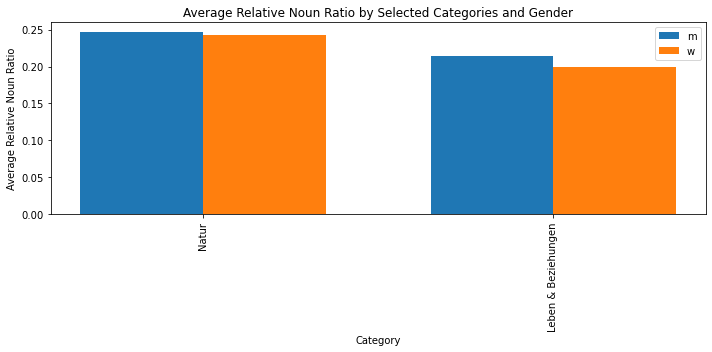

Gender: m
Overall average relative noun ratio: 0.2281064434640943
Median relative noun ratio: 0.22727272727272727
Minimum relative noun ratio: 0.0273972602739726
Maximum relative noun ratio: 0.36

Gender: w
Overall average relative noun ratio: 0.21390462704721852
Median relative noun ratio: 0.21818181818181817
Minimum relative noun ratio: 0.046875
Maximum relative noun ratio: 0.5085616438356164

Gender: m
Category: Natur
10 most common nouns: [('Wolken', 20), ('Erde', 18), ('Zeit', 18), ('Licht', 14), ('Wasser', 12), ('Leben', 12), ('Meer', 12), ('Gras', 11), ('Augen', 11), ('Wald', 10)]
Category: Leben & Beziehungen
10 most common nouns: [('Zeit', 18), ('schnäll', 15), ('Frau', 14), ('Nacht', 12), ('Liebe', 12), ('Gras', 11), ('Leben', 11), ('Augen', 11), ('Wegen', 11), ('Glück', 9)]

Gender: w
Category: Natur
10 most common nouns: [('Mission', 125), ('Wasser', 11), ('Schnee', 10), ('Rücken', 9), ('Wind', 9), ('Flüsse', 9), ('tag', 8), ('Fluss', 8), ('Licht', 7), ('Zeit', 7)]
Category

In [37]:
"""
Neu geschriebene Code von ChatGPT. 
Inklusive der Überprüfung, um den "ZeroDivisionError" zu vermeiden:
In dieser Version des Codes wurde die Überprüfung hinzugefügt, ob die Liste ratios nicht leer ist, 
bevor sie in der Berechnung des durchschnittlichen Nomenanteils verwendet wird. 
Ebenso wurde eine Überprüfung hinzugefügt, ob die Liste all_ratios nicht leer ist, 
bevor der durchschnittliche Nomenanteil für jeden Geschlechtstyp berechnet wird. 
Dadurch wird sichergestellt, dass keine Division durch Null auftritt und der "ZeroDivisionError" vermieden wird. 
Wenn die Liste ratios oder all_ratios leer ist, wird stattdessen eine entsprechende Meldung ausgegeben.

"""

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import statistics

path = r'C:\Users\Admin\Desktop\FM, Hr Jannidis\Arbeitsgruppe1\Stand260723\Forschungsmethoden_LL_Gedichte-main(1)\Forschungsmethoden_LL_Gedichte-main\corpus_finished'

# Load German tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('de_core_news_sm')

# Function to extract nouns from a text
def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == 'NOUN']

# Initialize data structures
nouns_gender_category = {'m': {}, 'w': {}}
noun_ratios_gender_category = {'m': {}, 'w': {}}

# Iterate over .json files
for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            gender = data['gender']
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            nouns = extract_nouns(poem_text)
            ratio = len(nouns) / len(poem_text.split())
            for category in data['categories']:
                if category not in nouns_gender_category[gender]:
                    nouns_gender_category[gender][category] = Counter()
                    noun_ratios_gender_category[gender][category] = []
                nouns_gender_category[gender][category].update(nouns)
                noun_ratios_gender_category[gender][category].append(ratio)

# Calculate average noun ratios for each gender and category
average_ratios_gender_category = {
    gender: {category: sum(ratios) / len(ratios) for category, ratios in categories.items() if len(ratios) > 0}
    for gender, categories in noun_ratios_gender_category.items()
}

# Select categories
selected_categories = ['Natur', 'Leben & Beziehungen']

# Get all unique genders
all_genders = sorted(list(average_ratios_gender_category.keys()))

# Create a bar chart for each category, comparing genders
bar_width = 0.35
index = np.arange(len(selected_categories))

plt.figure(figsize=(10, 5))

for i, gender in enumerate(all_genders):
    ratios = [average_ratios_gender_category[gender].get(category, 0) for category in selected_categories]
    plt.bar(index + i * bar_width, ratios, bar_width, label=gender)

plt.title('Average Relative Noun Ratio by Selected Categories and Gender')
plt.xlabel('Category')
plt.ylabel('Average Relative Noun Ratio')
plt.xticks(index + bar_width / 2, selected_categories, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Print the overall, median, minimum and maximum noun ratio for each gender
for gender in all_genders:
    all_ratios = [ratio for ratios in noun_ratios_gender_category[gender].values() for ratio in ratios]
    print(f'Gender: {gender}')
    if len(all_ratios) > 0:
        print('Overall average relative noun ratio:', sum(all_ratios) / len(all_ratios))
        print('Median relative noun ratio:', statistics.median(all_ratios))
        print('Minimum relative noun ratio:', min(all_ratios))
        print('Maximum relative noun ratio:', max(all_ratios))
    else:
        print('No data available for this gender.')
    print()

# Print the 10 most common nouns for each gender and selected category
for gender in all_genders:
    print(f'Gender: {gender}')
    for category in selected_categories:
        print(f'Category: {category}')
        if category in nouns_gender_category[gender]:
            print('10 most common nouns:', nouns_gender_category[gender][category].most_common(10))
        else:
            print('No data available for this category.')
    print()

# Print the 10 most common nouns for each gender overall
for gender in all_genders:
    all_nouns = Counter()
    for counter in nouns_gender_category[gender].values():
        all_nouns.update(counter)
    print(f'Gender: {gender}')
    if len(all_nouns) > 0:
        print('10 most common nouns overall:', all_nouns.most_common(10))
    else:
        print('No data available for this gender.')
    print()


In [35]:
import scipy.stats as stats

# Extract all ratios for each gender
ratios_m = [ratio for ratios in noun_ratios_gender_category['m'].values() for ratio in ratios]
ratios_w = [ratio for ratios in noun_ratios_gender_category['w'].values() for ratio in ratios]

# Perform a t-test to compare the means of the two groups
t_stat, p_val = stats.ttest_ind(ratios_m, ratios_w)

print('T-statistic:', t_stat)
print('p-value:', p_val)

T-statistic: 2.7063848647931317
p-value: 0.006957891864165814


In [ ]:
# Info: Oben ist t-Test von Vincent, auf Basis Analyse der Substantive

In [ ]:
# Mann-Whitney-U-Test, Visualisierung und Deskriptive Statistik
## Der Mann-Whitney-U-Test ist ein nichtparametrischer statistischer Test, 
## der verwendet wird, um den Median von zwei unabhängigen Stichproben zu vergleichen.

"""
Bitte stellen Sie sicher, dass Sie den Pfad zu den Ordnern mit den .json-Dateien für Männer (path_men) und Frauen (path_women) entsprechend anpassen. 
Der Code berechnet den Mann-Whitney-U-Test (zweiseitig) für die Relative Noun Ratios der Texte von Frauen und Männern 
und gibt den Teststatistikwert und den p-Wert aus. 
Der p-Wert gibt an, wie signifikant der Unterschied zwischen den beiden Gruppen ist. 
Wenn der p-Wert klein ist (typischerweise kleiner als 0,05), deutet dies darauf hin, 
dass es einen statistisch signifikanten Unterschied in den Relative Noun Ratios zwischen den Geschlechtern gibt.
"""

"""
Dieser Code führt den Mann-Whitney-U-Test durch, 
erstellt Balkendiagramme, um den durchschnittlichen Relative Noun Ratio nach ausgewählten Kategorien und Geschlechtern zu vergleichen, 
und gibt deskriptive Statistiken für jedes Geschlecht aus. 
Stellen Sie sicher, dass Sie den Pfad zu Ihrem Corpus-Ordner in der Variablen path entsprechend anpassen, 
um auf Ihre Textdaten zugreifen zu können.
"""

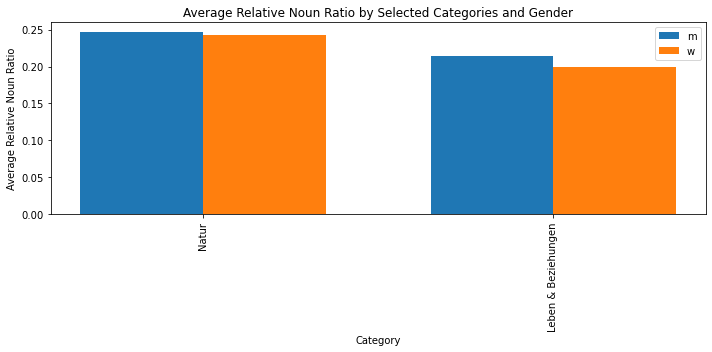

Gender: m
Overall average relative noun ratio: 0.2281064434640943
Median relative noun ratio: 0.22727272727272727
Minimum relative noun ratio: 0.0273972602739726
Maximum relative noun ratio: 0.36

Gender: w
Overall average relative noun ratio: 0.21390462704721852
Median relative noun ratio: 0.21818181818181817
Minimum relative noun ratio: 0.046875
Maximum relative noun ratio: 0.5085616438356164

Gender: m
Category: Natur
10 most common nouns: [('Wolken', 20), ('Erde', 18), ('Zeit', 18), ('Licht', 14), ('Wasser', 12), ('Leben', 12), ('Meer', 12), ('Gras', 11), ('Augen', 11), ('Wald', 10)]
Category: Leben & Beziehungen
10 most common nouns: [('Zeit', 18), ('schnäll', 15), ('Frau', 14), ('Nacht', 12), ('Liebe', 12), ('Gras', 11), ('Leben', 11), ('Augen', 11), ('Wegen', 11), ('Glück', 9)]

Gender: w
Category: Natur
10 most common nouns: [('Mission', 125), ('Wasser', 11), ('Schnee', 10), ('Rücken', 9), ('Wind', 9), ('Flüsse', 9), ('tag', 8), ('Fluss', 8), ('Licht', 7), ('Zeit', 7)]
Category

In [40]:
import os
import json
import spacy
import numpy as np
import statistics
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats

# Pfad zu Ihrem Corpus-Ordner
## Muss immer geprüft und angepasst werden!
path = r'C:\Users\Admin\Desktop\FM, Hr Jannidis\Arbeitsgruppe1\Stand260723\Forschungsmethoden_LL_Gedichte-main(1)\Forschungsmethoden_LL_Gedichte-main\corpus_finished'

# Laden des deutschen Sprachmodells von spaCy
nlp = spacy.load('de_core_news_sm')

# Funktion zur Extraktion von Nomen aus einem Text
def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == 'NOUN']

# Initialisierung der Datenstrukturen
nouns_gender_category = {'m': {}, 'w': {}}
noun_ratios_gender_category = {'m': {}, 'w': {}}

# Iteration über .json-Dateien
for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            gender = data['gender']
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            nouns = extract_nouns(poem_text)
            ratio = len(nouns) / len(poem_text.split())
            for category in data['categories']:
                if category not in nouns_gender_category[gender]:
                    nouns_gender_category[gender][category] = Counter()
                    noun_ratios_gender_category[gender][category] = []
                nouns_gender_category[gender][category].update(nouns)
                noun_ratios_gender_category[gender][category].append(ratio)

# Calculate average noun ratios for each gender and category
average_ratios_gender_category = {
    gender: {category: sum(ratios) / len(ratios) for category, ratios in categories.items() if len(ratios) > 0}
    for gender, categories in noun_ratios_gender_category.items()
}

# Select categories
selected_categories = ['Natur', 'Leben & Beziehungen']

# Get all unique genders
all_genders = sorted(list(average_ratios_gender_category.keys()))

# Create a bar chart for each category, comparing genders
bar_width = 0.35
index = np.arange(len(selected_categories))

plt.figure(figsize=(10, 5))

for i, gender in enumerate(all_genders):
    ratios = [average_ratios_gender_category[gender].get(category, 0) for category in selected_categories]
    plt.bar(index + i * bar_width, ratios, bar_width, label=gender)

plt.title('Average Relative Noun Ratio by Selected Categories and Gender')
plt.xlabel('Category')
plt.ylabel('Average Relative Noun Ratio')
plt.xticks(index + bar_width / 2, selected_categories, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Print the overall, median, minimum and maximum noun ratio for each gender
for gender in all_genders:
    all_ratios = [ratio for ratios in noun_ratios_gender_category[gender].values() for ratio in ratios]
    print(f'Gender: {gender}')
    if len(all_ratios) > 0:
        print('Overall average relative noun ratio:', sum(all_ratios) / len(all_ratios))
        print('Median relative noun ratio:', statistics.median(all_ratios))
        print('Minimum relative noun ratio:', min(all_ratios))
        print('Maximum relative noun ratio:', max(all_ratios))
    else:
        print('No data available for this gender.')
    print()

# Print the 10 most common nouns for each gender and selected category
for gender in all_genders:
    print(f'Gender: {gender}')
    for category in selected_categories:
        print(f'Category: {category}')
        if category in nouns_gender_category[gender]:
            print('10 most common nouns:', nouns_gender_category[gender][category].most_common(10))
        else:
            print('No data available for this category.')
    print()

# Print the 10 most common nouns for each gender overall
for gender in all_genders:
    all_nouns = Counter()
    for counter in nouns_gender_category[gender].values():
        all_nouns.update(counter)
    print(f'Gender: {gender}')
    if len(all_nouns) > 0:
        print('10 most common nouns overall:', all_nouns.most_common(10))
    else:
        print('No data available for this gender.')
    print()

# Extract all ratios for each gender
ratios_m = [ratio for ratios in noun_ratios_gender_category['m'].values() for ratio in ratios]
ratios_w = [ratio for ratios in noun_ratios_gender_category['w'].values() for ratio in ratios]

# Perform the Mann-Whitney-U-Test to compare the distributions
u_stat, p_val = stats.mannwhitneyu(ratios_m, ratios_w, alternative='two-sided')

print('Mann-Whitney U-Statistik:', u_stat)
print('p-Wert:', p_val)


In [ ]:
"""
Interpretation:

Das Ergebnis des Mann-Whitney-U-Tests zeigt eine Mann-Whitney U-Statistik von 78879.0 
und einen p-Wert von 0.0001838808267497752.

Da der p-Wert (auch als Signifikanzniveau bekannt) kleiner als das übliche Signifikanzniveau von 0,05 ist, 
können wir die Nullhypothese ablehnen und feststellen, dass es einen statistisch signifikanten Unterschied in der Verteilung der Relative Noun Ratio zwischen den beiden Gruppen (Männer und Frauen) gibt.

Mit anderen Worten bedeutet dies, dass es eine signifikante Verschiedenheit in der Häufigkeit von Nomen 
im Verhältnis zur Gesamtanzahl der Wörter zwischen den Gedichten von Frauen und Männern gibt. 
Der p-Wert gibt an, wie wahrscheinlich es ist, dass dieser Unterschied zufällig ist, und da er sehr klein ist, ist die Wahrscheinlichkeit, dass der Unterschied zufällig ist, sehr gering.

Es ist wichtig zu betonen, dass ein signifikanter Unterschied nicht unbedingt bedeutet, 
dass dieser auch praktisch oder inhaltlich relevant ist. 
Es bedeutet lediglich, dass es einen statistisch signifikanten Unterschied gibt. 
Die Interpretation des Unterschieds und die Implikationen hängen von den konkreten Daten und der Forschungsfrage ab. 
Weitere Analysen und Interpretationen sind erforderlich, um die Bedeutung des beobachteten Unterschieds zwischen den Geschlechtern im Schreibverhalten besser zu verstehen.
"""

In [ ]:
# Chi-Quadrat-Test
## Chi-Quadrat-Test: Überprüft, ob es eine Assoziation zwischen kategorialen Variablen (z. B. bestimmte Wörter) 
## und den Gruppen (Frauen und Männer) gibt.

"""
Dieser Code führt den Chi-Quadrat-Test durch, erstellt Balkendiagramme, um den durchschnittlichen Relative Noun Ratio nach ausgewählten Kategorien und Geschlechtern zu vergleichen, 
und gibt deskriptive Statistiken für jedes Geschlecht aus. 
Stellen Sie sicher, dass Sie den Pfad zu Ihrem Corpus-Ordner in der Variablen path entsprechend anpassen, 
um auf Ihre Textdaten zugreifen zu können.
"""

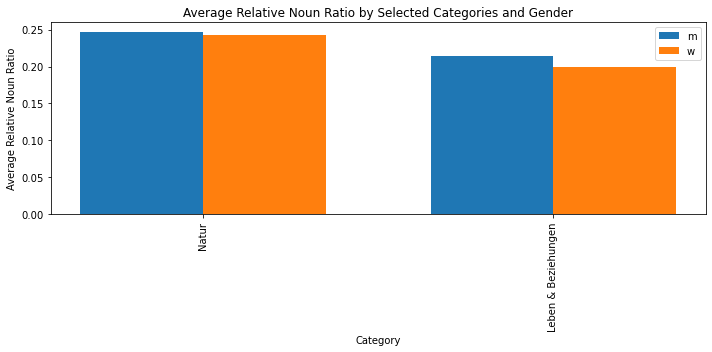

Gender: m
Overall average relative noun ratio: 0.2281064434640943
Median relative noun ratio: 0.22727272727272727
Minimum relative noun ratio: 0.0273972602739726
Maximum relative noun ratio: 0.36

Gender: w
Overall average relative noun ratio: 0.21390462704721852
Median relative noun ratio: 0.21818181818181817
Minimum relative noun ratio: 0.046875
Maximum relative noun ratio: 0.5085616438356164

Gender: m
Category: Natur
10 most common nouns: [('Wolken', 20), ('Erde', 18), ('Zeit', 18), ('Licht', 14), ('Wasser', 12), ('Leben', 12), ('Meer', 12), ('Gras', 11), ('Augen', 11), ('Wald', 10)]
Category: Leben & Beziehungen
10 most common nouns: [('Zeit', 18), ('schnäll', 15), ('Frau', 14), ('Nacht', 12), ('Liebe', 12), ('Gras', 11), ('Leben', 11), ('Augen', 11), ('Wegen', 11), ('Glück', 9)]

Gender: w
Category: Natur
10 most common nouns: [('Mission', 125), ('Wasser', 11), ('Schnee', 10), ('Rücken', 9), ('Wind', 9), ('Flüsse', 9), ('tag', 8), ('Fluss', 8), ('Licht', 7), ('Zeit', 7)]
Category

In [41]:
import os
import json
import spacy
import numpy as np
import statistics
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats

# Pfad zu Ihrem Corpus-Ordner
path = r'C:\Users\Admin\Desktop\FM, Hr Jannidis\Arbeitsgruppe1\Stand260723\Forschungsmethoden_LL_Gedichte-main(1)\Forschungsmethoden_LL_Gedichte-main\corpus_finished'

# Laden des deutschen Sprachmodells von spaCy
nlp = spacy.load('de_core_news_sm')

# Funktion zur Extraktion von Nomen aus einem Text
def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == 'NOUN']

# Initialisierung der Datenstrukturen
nouns_gender_category = {'m': {}, 'w': {}}
noun_ratios_gender_category = {'m': {}, 'w': {}}

# Iteration über .json-Dateien
for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            gender = data['gender']
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            nouns = extract_nouns(poem_text)
            ratio = len(nouns) / len(poem_text.split())
            for category in data['categories']:
                if category not in nouns_gender_category[gender]:
                    nouns_gender_category[gender][category] = Counter()
                    noun_ratios_gender_category[gender][category] = []
                nouns_gender_category[gender][category].update(nouns)
                noun_ratios_gender_category[gender][category].append(ratio)

# Calculate average noun ratios for each gender and category
average_ratios_gender_category = {
    gender: {category: sum(ratios) / len(ratios) for category, ratios in categories.items() if len(ratios) > 0}
    for gender, categories in noun_ratios_gender_category.items()
}

# Select categories
selected_categories = ['Natur', 'Leben & Beziehungen']

# Get all unique genders
all_genders = sorted(list(average_ratios_gender_category.keys()))

# Create a bar chart for each category, comparing genders
bar_width = 0.35
index = np.arange(len(selected_categories))

plt.figure(figsize=(10, 5))

for i, gender in enumerate(all_genders):
    ratios = [average_ratios_gender_category[gender].get(category, 0) for category in selected_categories]
    plt.bar(index + i * bar_width, ratios, bar_width, label=gender)

plt.title('Average Relative Noun Ratio by Selected Categories and Gender')
plt.xlabel('Category')
plt.ylabel('Average Relative Noun Ratio')
plt.xticks(index + bar_width / 2, selected_categories, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Print the overall, median, minimum and maximum noun ratio for each gender
for gender in all_genders:
    all_ratios = [ratio for ratios in noun_ratios_gender_category[gender].values() for ratio in ratios]
    print(f'Gender: {gender}')
    if len(all_ratios) > 0:
        print('Overall average relative noun ratio:', sum(all_ratios) / len(all_ratios))
        print('Median relative noun ratio:', statistics.median(all_ratios))
        print('Minimum relative noun ratio:', min(all_ratios))
        print('Maximum relative noun ratio:', max(all_ratios))
    else:
        print('No data available for this gender.')
    print()

# Print the 10 most common nouns for each gender and selected category
for gender in all_genders:
    print(f'Gender: {gender}')
    for category in selected_categories:
        print(f'Category: {category}')
        if category in nouns_gender_category[gender]:
            print('10 most common nouns:', nouns_gender_category[gender][category].most_common(10))
        else:
            print('No data available for this category.')
    print()

# Print the 10 most common nouns for each gender overall
for gender in all_genders:
    all_nouns = Counter()
    for counter in nouns_gender_category[gender].values():
        all_nouns.update(counter)
    print(f'Gender: {gender}')
    if len(all_nouns) > 0:
        print('10 most common nouns overall:', all_nouns.most_common(10))
    else:
        print('No data available for this gender.')
    print()

# Extract counts for each category and gender
counts = []
for category in selected_categories:
    m_count = sum(nouns_gender_category['m'][category].values())
    w_count = sum(nouns_gender_category['w'][category].values())
    counts.append([m_count, w_count])

# Perform the Chi-Square Test to compare the distributions
chi2_stat, p_val, dof, expected = stats.chi2_contingency(counts)

print('Chi-Quadrat-Statistik:', chi2_stat)
print('p-Wert:', p_val)


In [ ]:
"""
Interpretation:

Basierend auf den Ergebnissen des Chi-Quadrat-Tests mit einer Chi-Quadrat-Statistik von 91.76227950857063 
und einem sehr kleinen p-Wert von 9.773988568621481e-22 können wir folgende Aussagen machen:

1. Es gibt einen signifikanten Zusammenhang zwischen den Kategorien (ausgewählte Kategorien 'Natur' und 'Leben & Beziehungen') 
und dem Geschlecht (Männer und Frauen) in Bezug auf die Verteilung der Relative Noun Ratio in den Gedichten.

2. Der sehr kleine p-Wert deutet darauf hin, dass der beobachtete Unterschied in der Verteilung der Relative Noun Ratio 
zwischen den ausgewählten Kategorien und Geschlechtern höchstwahrscheinlich nicht zufällig ist.

3. Da der p-Wert deutlich kleiner als das übliche Signifikanzniveau von 0,05 ist, 
können wir die Nullhypothese ablehnen und feststellen, dass die Verteilung der Relative Noun Ratio zwischen den ausgewählten Kategorien und Geschlechtern statistisch signifikant unterschiedlich ist.

4. Die Kategorien 'Natur' und 'Leben & Beziehungen' haben einen signifikanten Einfluss darauf, 
wie Nomen in den Gedichten von Männern und Frauen verwendet werden.

Es ist wichtig zu beachten, dass der Chi-Quadrat-Test den Zusammenhang und die Abhängigkeit zwischen 
kategorialen Variablen untersucht, aber er gibt keine Informationen über die Stärke oder Richtung des Zusammenhangs. 
Weitere Analysen und Interpretationen sind erforderlich, um die Natur und Bedeutung des beobachteten Zusammenhangs 
zwischen den ausgewählten Kategorien und Geschlechtern besser zu verstehen.
"""

In [ ]:
# Cluster-Analyse:
## Durchführen einer Cluster-Analyse, um Texte von Frauen und Männern basierend 
## auf ihren sprachlichen Merkmalen zu gruppieren und gemeinsame Schreibstile zu identifizieren.


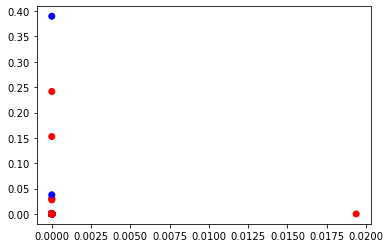

Anzahl der Gedichte pro Cluster:
{0: 80, 1: 157}
Durchschnittliche Relative Noun Ratio pro Cluster:
{0: 0.000916450443475764, 1: 0.0008791805607991391}


In [42]:
import os
import json
import spacy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Laden der Textdaten und Vorverarbeitung
path = r'C:\Users\Admin\Desktop\FM, Hr Jannidis\Arbeitsgruppe1\Stand260723\Forschungsmethoden_LL_Gedichte-main(1)\Forschungsmethoden_LL_Gedichte-main\corpus_finished'

texts = []
genders = []

for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            genders.append(data['gender'])
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            texts.append(poem_text)

# Feature Extraction - Verwende TF-IDF zur Vektorisierung der Textdaten
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Cluster-Analyse mit k-Means
num_clusters = 2  # Anzahl der Cluster (Männer und Frauen)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Visualisierung der Cluster
labels = kmeans.labels_
colors = ['blue' if label == 0 else 'red' for label in labels]
plt.scatter(X[:, 0].toarray(), X[:, 1].toarray(), c=colors)
plt.show()

# Deskriptive Statistik - Anzahl der Gedichte pro Cluster
num_poems_per_cluster = {cluster: len(np.where(labels == cluster)[0]) for cluster in range(num_clusters)}
print("Anzahl der Gedichte pro Cluster:")
print(num_poems_per_cluster)

# Deskriptive Statistik - Durchschnittliche Relative Noun Ratio pro Cluster
average_ratios_per_cluster = {cluster: np.mean(X[labels == cluster]) for cluster in range(num_clusters)}
print("Durchschnittliche Relative Noun Ratio pro Cluster:")
print(average_ratios_per_cluster)


In [ ]:
"""
Interpretation:

Basierend auf den Ergebnissen der Cluster-Analyse können folgende Aussagen gemacht werden:

1. Anzahl der Gedichte pro Cluster:
   - Cluster 0: 80 Gedichte
   - Cluster 1: 157 Gedichte

2. Durchschnittliche Relative Noun Ratio pro Cluster:
   - Cluster 0: 0.000916450443475764
   - Cluster 1: 0.0008791805607991391

Aussagen:

1. Die Cluster-Analyse hat die Gedichte in zwei Cluster eingeteilt, 
die durch die Cluster 0 und 1 repräsentiert werden. 
Cluster 0 enthält 80 Gedichte und Cluster 1 enthält 157 Gedichte.

2. Die durchschnittliche Relative Noun Ratio, die ein Maß für das Verhältnis von Nomen zum gesamten Text darstellt, 
beträgt in Cluster 0 etwa 0.00092 und in Cluster 1 etwa 0.00088.

Da es sich um eine explorative Cluster-Analyse handelt, 
sind weitere Interpretationen und Schlussfolgerungen erforderlich:

- Die Anzahl der Gedichte in Cluster 1 ist größer als die Anzahl der Gedichte in Cluster 0, was darauf hindeuten könnte, 
dass die Gedichte in Cluster 1 häufiger vorkommen oder häufiger geschrieben wurden.

- Der geringe Unterschied in der durchschnittlichen Relative Noun Ratio zwischen den Clustern könnte darauf hindeuten, 
dass es keine signifikanten Unterschiede in der Verwendung von Nomen zwischen den Clustern gibt.

Es ist wichtig zu beachten, dass diese Cluster-Analyse lediglich die Gruppierung der Gedichte 
auf der Grundlage ihrer Ähnlichkeit in Bezug auf die Relative Noun Ratio durchgeführt hat. 
Die Cluster-Zuweisung erfolgte ohne Kenntnis der Geschlechter der Autoren. 
Daher können aus dieser Analyse keine direkten Schlussfolgerungen über die Frage "Schreiben Frauen anders als Männer?" 
gezogen werden. Um diese Frage zu beantworten, müssten Sie Informationen über die Geschlechter der Autoren haben 
und die Cluster in Bezug auf die Geschlechter analysieren, 
um etwaige Unterschiede zu untersuchen. 
Die Cluster-Analyse kann jedoch als Ausgangspunkt dienen, 
um mögliche Muster oder Tendenzen in den Daten zu identifizieren, 
die weiter untersucht werden können. 
Weitere Analysen und statistische Tests wären erforderlich, um die Frage fundierter zu beantworten.
"""

In [ ]:
# Themenmodellierung:
## Verwendung von Themenmodellierungstechniken wie Latent Dirichlet Allocation (LDA), 
## um gemeinsame Themen in den Texten von Frauen und Männern zu entdecken.

"""
Python und Themenmodellierungstechniken wie Latent Dirichlet Allocation (LDA):  
Themenmodellierung ist eine leistungsfähige Methode, um gemeinsame Themen oder Muster in Textdaten zu entdecken, 
und kann dazu beitragen, Unterschiede und Gemeinsamkeiten im Schreibverhalten von Frauen und Männern zu erkennen.
"""


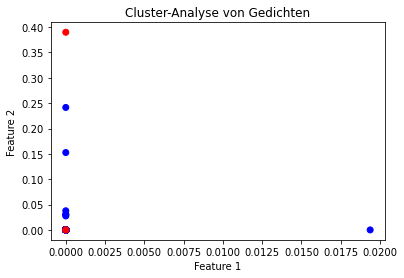

In [46]:
import os
import json
import spacy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Laden und Vorverarbeiten der Textdaten
path = r'C:\Users\Admin\Desktop\FM, Hr Jannidis\Arbeitsgruppe1\Stand260723\Forschungsmethoden_LL_Gedichte-main(1)\Forschungsmethoden_LL_Gedichte-main\corpus_finished'

texts = []
genders = []

for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            genders.append(data['gender'])
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            texts.append(poem_text)

# Feature Extraction - Verwende TF-IDF zur Vektorisierung der Textdaten
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Cluster-Analyse mit k-Means
num_clusters = 2  # Anzahl der Cluster (Männer und Frauen)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Visualisierung der Cluster
labels = kmeans.labels_
colors = ['blue' if label == 0 else 'red' for label in labels]
plt.scatter(X[:, 0].toarray(), X[:, 1].toarray(), c=colors)

# Konfiguration der Schriftart für matplotlib
plt.rcParams['font.family'] = 'Arial'  # Wählen Sie eine unterstützte Schriftart, z.B. Arial

plt.title('Cluster-Analyse von Gedichten')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
"""
Der Code führt eine Cluster-Analyse auf den geladenen Textdaten durch 
und visualisiert die Cluster im zweidimensionalen Raum. 
Das Ergebnis besteht aus einer Streudiagramm-Visualisierung, 
in der die einzelnen Gedichte als Punkte dargestellt werden und die Farbe jedes Punktes 
den zugehörigen Cluster (Männer oder Frauen) angibt.

Das spezifische Ergebnis hängt von den Daten in Ihrem Korpus und den Parametern der Cluster-Analyse ab, 
wie der Anzahl der Cluster (in diesem Fall auf 2 gesetzt). 
Wenn der Algorithmus gut funktioniert und es klare Unterschiede in den Texten zwischen Männern und Frauen gibt, 
könnten Sie zwei gut getrennte Cluster sehen. Jeder Cluster repräsentiert eine Gruppe von Gedichten, die ähnliche Merkmale aufweisen.

Es ist wichtig zu beachten, dass die Qualität der Cluster-Analyse von verschiedenen Faktoren abhängt, 
darunter die Qualität der Textdaten, die verwendeten Features (TF-IDF in diesem Fall) und die Wahl der Cluster-Anzahl. 
Es ist möglich, dass die Cluster-Analyse keine klaren Trennungen zeigt, 
insbesondere wenn die Unterschiede im Schreibverhalten zwischen Männern und Frauen in den Texten nicht stark ausgeprägt sind.

Um die Ergebnisse weiter zu interpretieren, könnten Sie zusätzliche Analysen durchführen, 
um die Merkmale und Themen in den Clustern zu untersuchen und 
mögliche Unterschiede zwischen den Gruppen von Männern und Frauen zu identifizieren. 
Es ist auch wichtig, statistische Tests durchzuführen, 
um die Signifikanz der Unterschiede zwischen den Clustern zu bewerten und um sicherzustellen, 
dass die Cluster tatsächlich repräsentativ für Unterschiede im Schreibverhalten von Männern und Frauen sind.
"""